# Proiect Teoria Informatiei

In [1]:
# from qiskit_ibm_runtime import QiskitRuntimeService
#
# # Save an IBM Quantum account and set it as your default account.
# QiskitRuntimeService.save_account(
#     channel="ibm_quantum",
#     token="b58a57d5b623a7e4a4466004f44c25729c8ff67d9801d0749faf456dd5c05a5d785260cf68d8142489a2eb03f705e9261b0a8fc310ff7ec337c20ad7816b62f9",
#     set_as_default=True,
#     # Use `overwrite=True` if you're updating your token.
#     overwrite=True,
# )

# Load saved credentials
# service = QiskitRuntimeService()

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, QasmSimulator
from qiskit.quantum_info import random_unitary, state_fidelity, DensityMatrix
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit_aer.noise.errors import amplitude_damping_error
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
#from qiskit_ibm_runtime import QiskitRuntimeService

import random
import matplotlib.pyplot as plt
import numpy as np
import qiskit.quantum_info as qi

Biti random: [1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


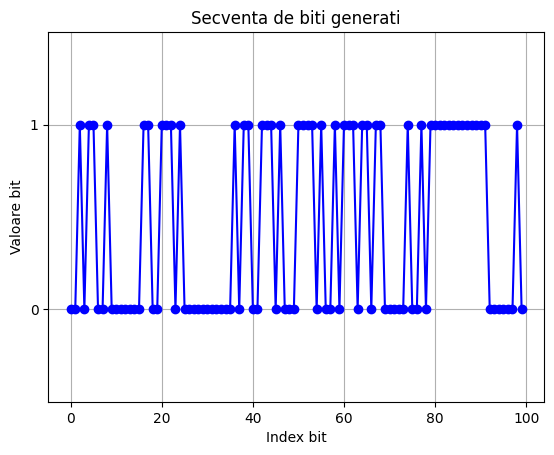

In [5]:
# generator de o secventa de n biti random folosind logica cuantica
def generate_qrng(n):
    # simulator pt circuite cuantice
    simulator = Aer.get_backend('aer_simulator')

    # initializam un circuit cuantic
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit

    random_bits = []

    for _ in range(n):
        # aplicam poarta Hadamard pentru a crea o superpozitie
        qc.h(0)
        # masuram qubitul
        qc.measure(0, 0)

        # transpile & simulate
        transpiled_qc = transpile(qc, simulator)
        job = simulator.run(transpiled_qc, shots=1)
        result = job.result()

        # extragem bitul masurat
        counts = result.get_counts()
        bit = int(list(counts.keys())[0])  # 0 sau 1
        random_bits.append(bit)

        # resetam circuitul pt urmatorul bit
        qc.reset(0)

    return random_bits

# generam 10 biti random pt cheie
key_bits = generate_qrng(10)
print("Biti random:", key_bits)

key_bits_for_distribution = generate_qrng(100)  # Generăm 100 de biți pentru o distribuție mai clară

# Creăm un grafic liniar
plt.plot(range(len(key_bits_for_distribution)), key_bits_for_distribution, marker='o', linestyle='-', color='blue')
plt.xlabel('Index bit')
plt.ylabel('Valoare bit')
plt.title('Secventa de biti generati')
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ['0', '1'])
plt.grid(True)

plt.show()

Alice's key bits: [0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
Alice's basis: ['Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X']
Bob's basis: ['Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z']
Final shared key: [0, 1, 1, 1]


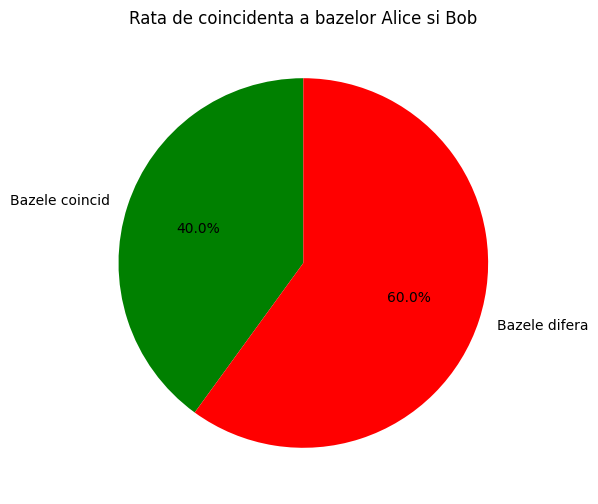

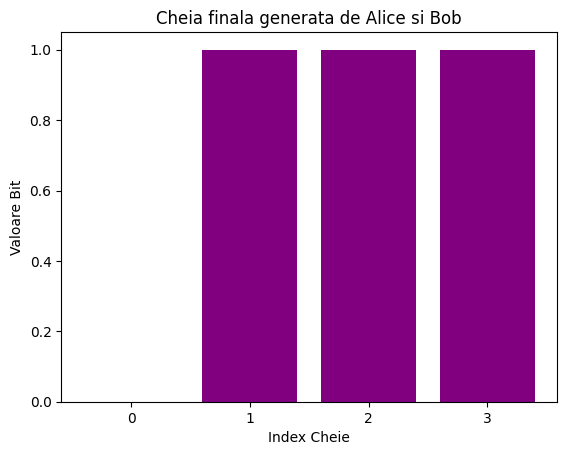

In [80]:
# fara interceptare
# 1
basis_choices = [random.choice(['X', 'Z']) for _ in range(10)]

# 2
bob_basis = [random.choice(['X', 'Z']) for _ in range(10)]

results = []
simulator = Aer.get_backend('aer_simulator')

for bit, alice_basis, bob_basis_choice in zip(key_bits, basis_choices, bob_basis):
    # 2 Alice creaza un circuit cuantic nou si codifica bitul
    qc = QuantumCircuit(1, 1)

    if bit == 1:
        qc.x(0)  # inverseaza starea la |1>
    if alice_basis == 'X':
        qc.h(0)  # aplicam hadamard pentru baza X

    # 3
    if bob_basis_choice == 'X':
        qc.h(0)  # aplicam hadamard pentru a masura
    qc.measure(0, 0)

    # transpile & simulate
    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc, shots=1)
    bob_result = int(list(job.result().get_counts())[0])  # Rezultatul Bob

    results.append(bob_result)

# 8 - comparam bazele și calculam rata de erori
final_key = [
    alice_bit for alice_bit, alice_basis, bob_basis_choice, bob_result in zip(
        key_bits, basis_choices, bob_basis, results) if alice_basis == bob_basis_choice
]

print(f"Alice's key bits: {key_bits}")
print(f"Alice's basis: {basis_choices}")
print(f"Bob's basis: {bob_basis}")
print(f"Final shared key: {final_key}")

# Calculăm rata de coincidență
coincident_bases = [a == b for a, b in zip(basis_choices, bob_basis)]
coincidence_rate = sum(coincident_bases) / len(basis_choices) * 100

# Grafic circular pentru rata de coincidență
labels = ['Bazele coincid', 'Bazele difera']
sizes = [coincidence_rate, 100 - coincidence_rate]
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Rata de coincidenta a bazelor Alice si Bob')
plt.show()

# Grafic cu cheia finală
plt.bar(range(len(final_key)), final_key, color='purple')
plt.xlabel('Index Cheie')
plt.ylabel('Valoare Bit')
plt.title('Cheia finala generata de Alice si Bob')
plt.xticks(range(len(final_key)))
plt.show()


Alice's key bits: [0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
Alice's basis: ['Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X']
Eve's basis: ['Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X']
Bob's basis: ['Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z']
Final shared key: [0, 1, 1]
Error rate due to Eve: 10.0 %


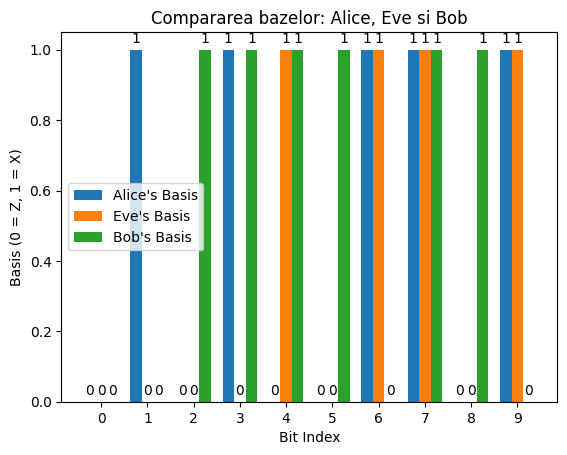

In [85]:
# cu interceptare
# 1
basis_choices = [random.choice(['X', 'Z']) for _ in range(10)]

# 2
bob_basis = [random.choice(['X', 'Z']) for _ in range(10)]

# 3
eve_basis = [random.choice(['X', 'Z']) for _ in range(10)]

results = []
simulator = Aer.get_backend('aer_simulator')
errors = 0  # erori

for bit, alice_basis, eve_basis_choice, bob_basis_choice in zip(key_bits, basis_choices, eve_basis, bob_basis):
    # 4 Alice creaza un circuit cuantic nou si codifica bitul
    qc = QuantumCircuit(1, 1)

    if bit == 1:
        qc.x(0)  # inverseaza starea la |1>
    if alice_basis == 'X':
        qc.h(0)  # aplicam hadamard pentru baza X

    # 5 Eve intercepteaza si masoara qubitul
    if eve_basis_choice == 'X':
        qc.h(0)  # masoara in baza X
    qc.measure(0, 0)

    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc, shots=1)
    eve_result = int(list(job.result().get_counts())[0])  # Rezultatul Eve

    # 6 Eve retrimite qubitul către Bob
    qc = QuantumCircuit(1, 1)  # resetam circuitul pentru a simula faptul ca Eve creeaza un nou qubit bazat pe observatia ei.
    if eve_result == 1:
        qc.x(0)  # codifica rezultatul lui Eve

    # 7
    if bob_basis_choice == 'X':
        qc.h(0)  # aplicam hadamard pentru a masura
    qc.measure(0, 0)

    # transpile & simulate
    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc, shots=1)
    bob_result = int(list(job.result().get_counts())[0])  # Rezultatul Bob

    results.append(bob_result)

    # verificam daca Eve a introdus o eroare
    if alice_basis == bob_basis_choice and bob_result != bit:
        errors += 1

# 8 - comparam bazele și calculam rata de erori
final_key = [
    alice_bit for alice_bit, alice_basis, bob_basis_choice, bob_result in zip(
        key_bits, basis_choices, bob_basis, results) if alice_basis == bob_basis_choice
]

print(f"Alice's key bits: {key_bits}")
print(f"Alice's basis: {basis_choices}")
print(f"Eve's basis: {basis_choices}")
print(f"Bob's basis: {bob_basis}")
print(f"Final shared key: {final_key}")

print("Error rate due to Eve:", errors / len(key_bits) * 100, "%")

# Creează o reprezentare grafică pentru bazele lui Alice, Eve și Bob
x = np.arange(len(basis_choices))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, [1 if b == 'X' else 0 for b in basis_choices], width, label="Alice's Basis")
rects2 = ax.bar(x, [1 if b == 'X' else 0 for b in eve_basis], width, label="Eve's Basis")
rects3 = ax.bar(x + width, [1 if b == 'X' else 0 for b in bob_basis], width, label="Bob's Basis")

# Configurări grafic
ax.set_xlabel('Bit Index')
ax.set_ylabel('Basis (0 = Z, 1 = X)')
ax.set_title("Compararea bazelor: Alice, Eve si Bob")
ax.set_xticks(x)
ax.set_xticklabels(range(len(basis_choices)))
ax.legend()

# Adăugăm etichete pentru valori
for rect in rects1 + rects2 + rects3:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()



In [40]:
# Functie pentru a genera o maximally mixed quantum state (key-controlled)
def generate_maximally_mixed_state(key):
    qc = QuantumCircuit(1, 1)
    if key == 1:
        qc.x(0) # Aplicam operatorul X daca bitul cheii este 1
    qc.h(0) # Aplicam operatorul X daca bitul cheii este 1
    qc.barrier() # Adaugam o bariera pentru claritate
    return qc

# Functie pentru a cripta starea amestecata
def encrypt_mixed_states(key):
    simulator = AerSimulator(method='density_matrix') # Simulator pentru matrici de densitate
    encrypted_states = []
    for key_bit in key:
        qc = generate_maximally_mixed_state(key_bit) # Generam starea cu cheia corespunzatoare
        qc.save_density_matrix()  # Salvam matricea de densitate
        transpiled_qc = transpile(qc, simulator) # Transpune circuitul pentru simulator
        result = simulator.run(transpiled_qc).result() # Rulam simularea
        density_matrix = DensityMatrix(result.data(0)['density_matrix'])  # Extragerea matricei de densitate
        encrypted_states.append(density_matrix) # Salvam matricea de densitate criptata
    return encrypted_states

# Functie pentru a aplica zgomot asupra starii
def apply_noise(states):
    # Definim modelul de zgomot
    noise_model = NoiseModel()
    depolarizing = depolarizing_error(0.1, 1)  #  roare de depolarizare de 10%
    amplitude_damping = amplitude_damping_error(0.05)  # Amortizare de amplitudine de 5%
    noise_model.add_all_qubit_quantum_error(depolarizing, ['h', 'x']) # Adaugam zgomot pentru H si X
    noise_model.add_all_qubit_quantum_error(amplitude_damping, ['h', 'x']) # Adaugam amortizare

    simulator = AerSimulator(noise_model=noise_model, method='density_matrix') # Simulator cu zgomot
    noisy_states = []

    for state in states:
        # Convertim matricea de densitate inapoi intr-un vector de stare
        state_vector = state.to_statevector()

        qc = QuantumCircuit(1) # Cream un circuit pentru initializare
        qc.initialize(state_vector.data, 0)  # Initializam cu vectorul de stare
        qc.save_density_matrix()  # Salvam matricea de densitate dupa aplicarea zgomotului

        transpiled_qc = transpile(qc, simulator) # Transpunem circuitul pentru simulator
        result = simulator.run(transpiled_qc).result() # Rulam simularea
        noisy_density_matrix = DensityMatrix(result.data(0)['density_matrix'])  # Extragerea matricei de densitate
        noisy_states.append(noisy_density_matrix) # Salvam matricea cu zgomot

    return noisy_states

# Functie pentru a verifica autentificarea pe baza fidelitatii
def verify_authentication(encrypted_states, received_states, tolerance=0.1):
    for original, received in zip(encrypted_states, received_states):
        # Calculam fidelitatea ca trasabilitatea produsului matricilor de densitate
        fidelity = np.trace(np.dot(original.data, received.data)).real
        if fidelity < 1 - tolerance: # Verificam daca fidelitatea este sub pragul acceptat
            return False
    return True

# Definim cheia pentru Alice
key = [0, 1, 0, 1, 1]
print(f"Cheie Alice: {key}")

# Alice cripteaza mixed states
alice_encrypted_states = encrypt_mixed_states(key)
print("Starile criptate Alice:", alice_encrypted_states)

# Simulam zgomotul in timpul transmisiei catre Bob
bob_received_states = apply_noise(alice_encrypted_states)
print("Starile primite de bob cu zgomot:", bob_received_states)

# Bob verifica autentificarea
is_valid = verify_authentication(alice_encrypted_states, bob_received_states)
print("Autentificare valida:", is_valid)

Cheie Alice: [0, 1, 0, 1, 1]
Starile criptate Alice: [DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,)), DensityMatrix([[ 0.5+0.000000e+00j, -0.5+6.123234e-17j],
               [-0.5-6.123234e-17j,  0.5+0.000000e+00j]],
              dims=(2,)), DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,)), DensityMatrix([[ 0.5+0.000000e+00j, -0.5+6.123234e-17j],
               [-0.5-6.123234e-17j,  0.5+0.000000e+00j]],
              dims=(2,)), DensityMatrix([[ 0.5+0.000000e+00j, -0.5+6.123234e-17j],
               [-0.5-6.123234e-17j,  0.5+0.000000e+00j]],
              dims=(2,))]
Starile primite de bob cu zgomot: [DensityMatrix([[0.5+0.00000000e+00j, 0.5+1.11022302e-16j],
               [0.5-1.11022302e-16j, 0.5+0.00000000e+00j]],
              dims=(2,)), DensityMatrix([[ 0.5+0.00000000e+00j, -0.5+1.11022302e-16j],
               [-0.5-1.11022302e-16j,  0.5+0.00000000e+00j]],
              dims=(2,)), 

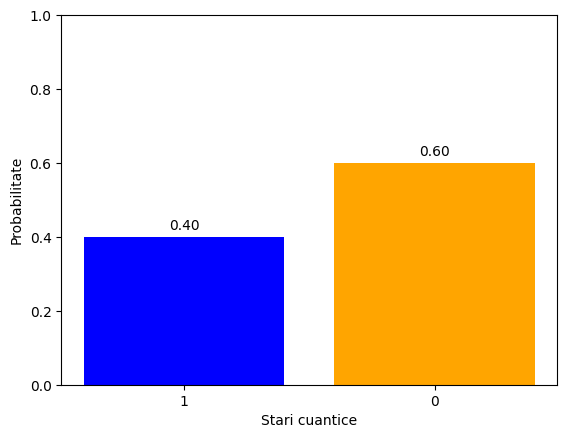

In [60]:
%matplotlib inline
qc = QuantumCircuit(1, 1)

qc.h(0)
qc.measure(0, 0)

simulator = Aer.get_backend('qasm_simulator') # statevector for bloch, qasm_simulator for

transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=10)
result = job.result()
counts = result.get_counts()

# Plot the measurement results
states = list(counts.keys())
probabilities = [count / sum(counts.values()) for count in counts.values()]

plt.bar(states, probabilities, color=['blue', 'orange'])
plt.xlabel("Stari cuantice")
plt.ylabel("Probabilitate")

# Annotate bars with probabilities
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center')

plt.ylim(0, 1)
plt.show()